# Define the system  

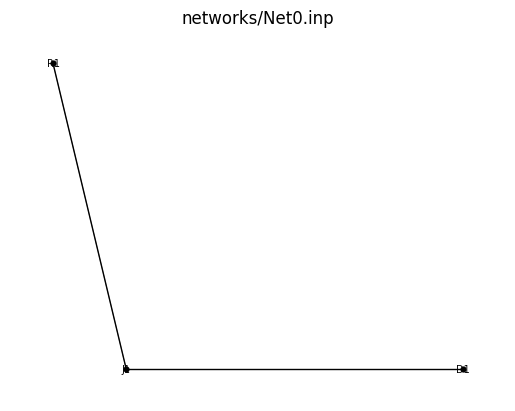

<Axes: title={'center': 'networks/Net0.inp'}>

In [1]:
import wntr
import wntr_quantum

# Create a water network model
inp_file = "networks/Net0.inp"
# inp_file = 'networks/Net2Loops.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)

## Run with the original simulator

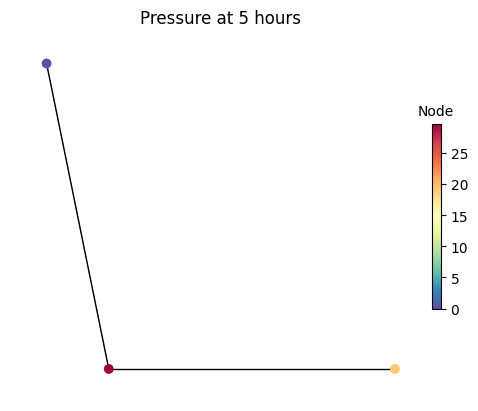

<Axes: title={'center': 'Pressure at 5 hours'}>

In [2]:
# define the classical simulator
sim = wntr.sim.EpanetSimulator(wn)

# run the simulation
results = sim.run_sim()

# Plot results on the network
pressure_at_5hr_ref = results.node["pressure"].loc[0, :]
wntr.graphics.plot_network(
    wn,
    node_attribute=pressure_at_5hr_ref,
    node_size=50,
    title="Pressure at 5 hours",
    node_labels=False,
)

## Run with the VQLS solver

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so


100%|██████████| 4/4 [00:00<00:00, 1933.30it/s]


Solving the linear system Ax = b with:
A =  [[ 0.1155474 -0.1155474]
 [-0.1155474  2.454284 ]]
b =  [ -1.614401 230.2773  ]
x =  [83.79769706 97.77185692]
residue =  0.0002768448823826178


100%|██████████| 4/4 [00:00<00:00, 973.33it/s]


Solving the linear system Ax = b with:
A =  [[ 0.02715334 -0.02715334]
 [-0.02715334  0.8397154 ]]
b =  [-0.9336202 79.97099  ]
x =  [63.01052121 97.27340263]
residue =  0.0032687535408205733


100%|██████████| 4/4 [00:00<00:00, 2181.98it/s]


Solving the linear system Ax = b with:
A =  [[ 0.02720346 -0.02720346]
 [-0.02720346  0.8412898 ]]
b =  [-0.9353407 80.12097  ]
x =  [62.89924999 97.26975324]
residue =  0.0003441130815105085


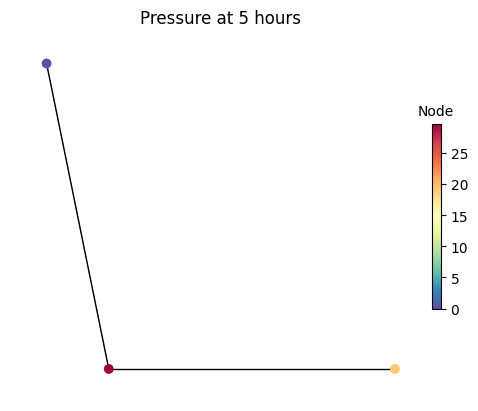

<Axes: title={'center': 'Pressure at 5 hours'}>

In [3]:
from quantum_newton_raphson.vqls_solver import VQLS_SOLVER
from qiskit.primitives import Estimator
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import CG

# define the ansatz
qc = RealAmplitudes(1, reps=3, entanglement="full")

# define the estimator : WARNING This is redefined in vqls_solver becauseof a qiskit bug
estimator = Estimator()

linear_solver = VQLS_SOLVER(
    estimator=estimator, ansatz=qc, optimizer=CG(), matrix_decomposition="pauli"
)


# define the quantum epanet simulator
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn, linear_solver=linear_solver)

# run the simulation
results = sim.run_sim(linear_solver=linear_solver)

# Plot results on the network
pressure_at_5hr = results.node["pressure"].loc[0, :]
wntr.graphics.plot_network(
    wn,
    node_attribute=pressure_at_5hr,
    node_size=50,
    title="Pressure at 5 hours",
    node_labels=False,
)

## Compare the pressure values obtained

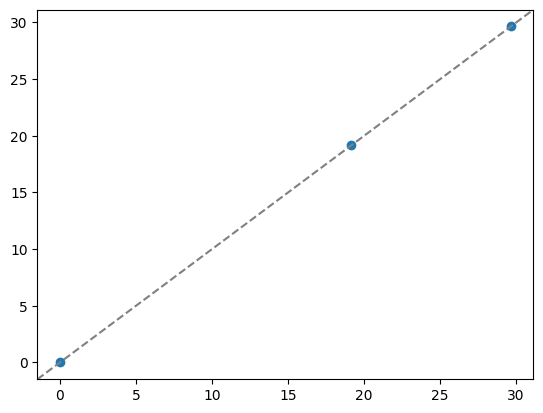

In [5]:
import matplotlib.pyplot as plt

plt.scatter(pressure_at_5hr_ref.values, pressure_at_5hr.values)
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.show()